<a href="https://colab.research.google.com/github/nthnsuh/Fraudulent_Banknotes_Modeling/blob/main/Final_Suh_Nathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
# Start solution here
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data_banknote_authentication.txt", header=None, names=['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'])

EDA

Attribute information
0. variance of Wavelet Transformed image (continuous)
1. skewness of Wavelet Transformed image (continuous)
2. curtosis of Wavelet Transformed image (continuous)
3. entropy of image (continuous)
4. class (integer)



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sn
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


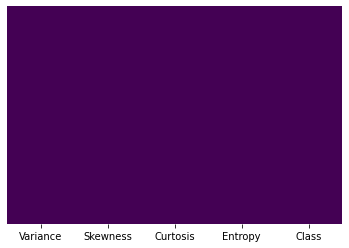

In [5]:
sn.heatmap(data.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

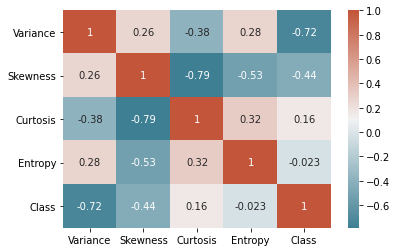

In [6]:
corr = data.corr()
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sn.diverging_palette(220, 20, as_cmap=True))
plt.show()

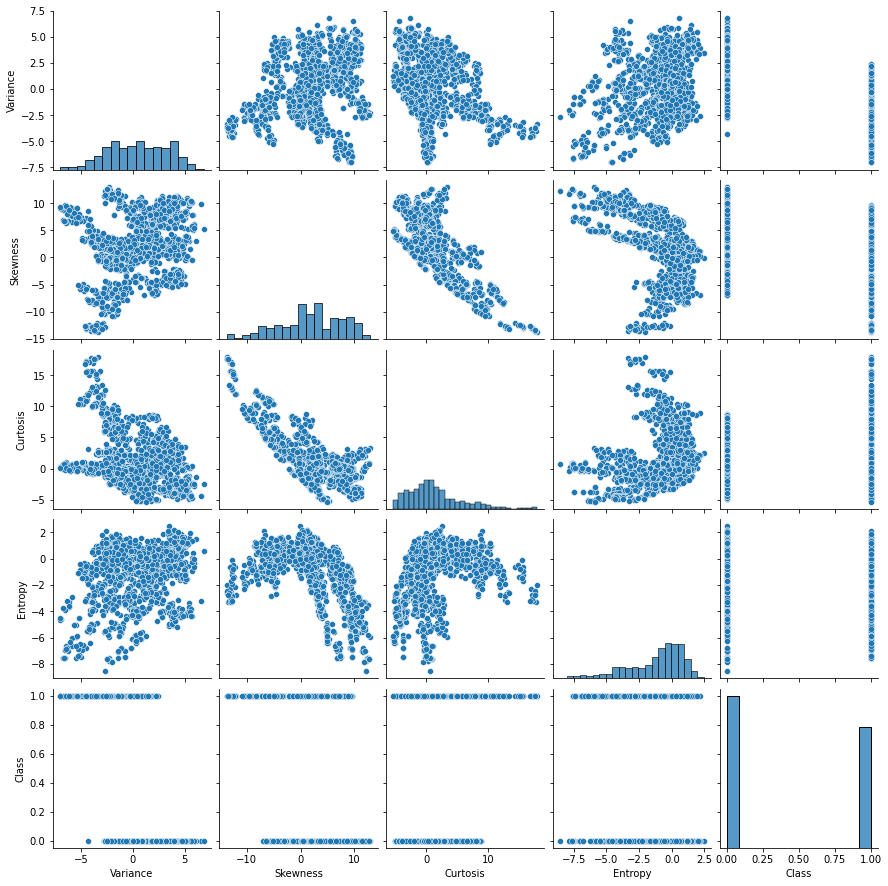

In [7]:
sn.pairplot(data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


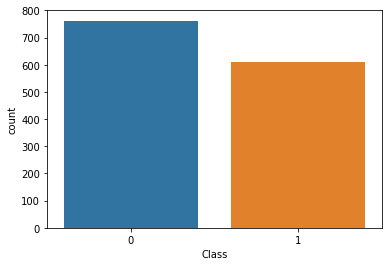

In [8]:
sn.countplot(data['Class'])

Models:

In [9]:
# Partitioning
y = data['Class']
X = data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2020)

Dummy Model

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", baseline_acc)


Baseline Accuracy =  0.5533980582524272


Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 

logReg = LogisticRegression()
logReg.fit(X_train, y_train)
log_pred = logReg.predict(X_test)
log_predi = logReg.predict(X_train)
print('Test Set Accuracy:', metrics.accuracy_score(y_test, log_pred))
print('Training Set Accuracy:', metrics.accuracy_score(y_train, log_predi))

Test Set Accuracy: 0.9927184466019418
Training Set Accuracy: 0.9895833333333334


[[226   2]
 [  1 183]]


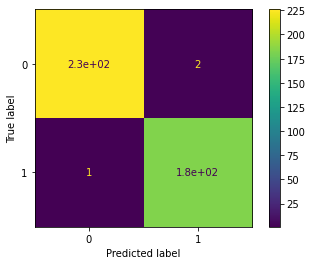

In [8]:
cnf_matrix = metrics.confusion_matrix(y_test, log_pre d)
print(cnf_matrix)
metrics.plot_confusion_matrix(logReg, X_test, y_test)
plt.show()

Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_predi = dt.predict(X_train)
print('Test Set Accuracy:', metrics.accuracy_score(y_test, dt_pred))
print('Training Set Accuracy:', metrics.accuracy_score(y_train, dt_predi))

Test Set Accuracy: 0.9757281553398058
Training Set Accuracy: 1.0


[[223   5]
 [  4 180]]


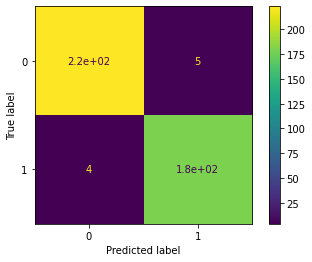

In [10]:
cnf_matrix = metrics.confusion_matrix(y_test, dt_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

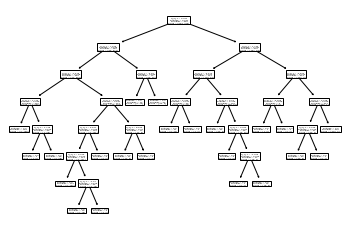

In [11]:
from sklearn import tree
plt.figure(2)
fakeNotes = tree.plot_tree(dt)
plt.show()

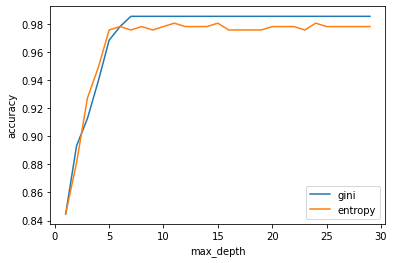

In [36]:
# prunning
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(metrics.accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(metrics.accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [24]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=7)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_predi = dtree.predict(X_train)
print('Test Set Accuracy:', metrics.accuracy_score(y_test, dtree_pred))
print('Training Set Accuracy:', metrics.accuracy_score(y_train, dtree_predi))

Test Set Accuracy: 0.9854368932038835
Training Set Accuracy: 1.0


[[225   3]
 [  3 181]]


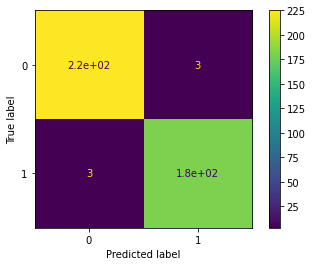

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test, dtree_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(dtree, X_test, y_test)
plt.show()

Bagging

In [15]:
from sklearn.ensemble import BaggingClassifier
model_bagging = BaggingClassifier(n_estimators=100)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
predi_bagging = model_bagging.predict(X_train)
acc_bagging=metrics.accuracy_score(y_test,pred_bagging)
acci_bagging=metrics.accuracy_score(y_train,predi_bagging)

print('Test Set Accuracy = ', acc_bagging)
print('Training Set Accuracy = ', acci_bagging)

Test Set Accuracy =  0.9830097087378641
Training Set Accuracy =  1.0


[[224   4]
 [  3 181]]


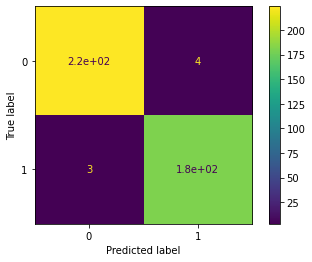

In [16]:
cnf_matrix = metrics.confusion_matrix(y_test, pred_bagging)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_bagging, X_test, y_test)
plt.show()

Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
predicti_rf = model_rf.predict(X_train)
acc_rf = metrics.accuracy_score(y_test, predict_rf)
acci_rf = metrics.accuracy_score(y_train, predicti_rf)

print('Test Set Accuracy = ', acc_rf)
print('Training Set Accuracy = ', acci_rf)

Test Set Accuracy =  0.9902912621359223
Training Set Accuracy =  1.0


[[225   3]
 [  0 184]]


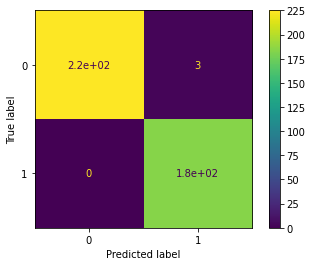

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, predict_rf)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_rf, X_test, y_test)
plt.show()

Ada Boost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
base_est = DecisionTreeClassifier (max_depth =2)
ada_boost = AdaBoostClassifier(base_est, n_estimators=100, random_state=42, learning_rate=.05)
ada_boost.fit(X_train, y_train)
predict_ada = ada_boost.predict(X_test)
acc_ada = metrics.accuracy_score(y_test, predict_ada)
predicti_ada = ada_boost.predict(X_train)
acci_ada = metrics.accuracy_score(y_train, predicti_ada)

print('Test Set Accuracy = ', acc_ada)
print('Training Set Accuracy = ', acci_ada)

Test Set Accuracy =  0.9951456310679612
Training Set Accuracy =  1.0


[[226   2]
 [  0 184]]


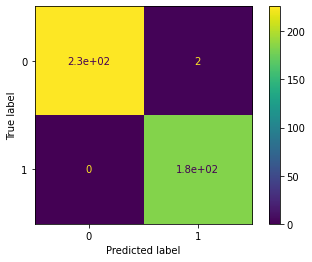

In [61]:
cnf_matrix = metrics.confusion_matrix(y_test, predict_ada)
print(cnf_matrix)
metrics.plot_confusion_matrix(ada_boost, X_test, y_test)
plt.show()